In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
google = pd.read_csv("GOOG.csv", index_col = "date")[::-1]
apple = pd.read_csv("AAPL.csv", index_col = "date")[::-1]
amazon = pd.read_csv("AMZN.csv", index_col = "date")[::-1]
microsoft = pd.read_csv("MSFT.csv", index_col = "date")[::-1]
walmart = pd.read_csv("Walmart.csv", index_col = "date")[::-1]

# remove 0,1,2,3 column and sort by date with index_col
# [::-1] will reverse graph

In [3]:
walmart.drop(walmart.index[-1], inplace = True)   #drop firt column without date, only time (today)
walmart.head()

,close,volume,open,high,low
date,,,,,
2014/02/10,73.76,6204086.0000,73.59,73.760,72.96
2014/02/11,74.80,6511228.0000,73.90,74.850,73.67
2014/02/12,74.96,5339771.0000,74.22,75.180,74.22
2014/02/13,75.36,5250165.0000,74.68,75.490,74.56
2014/02/14,75.79,4919940.0000,75.40,75.985,75.10


# 5 year stock price

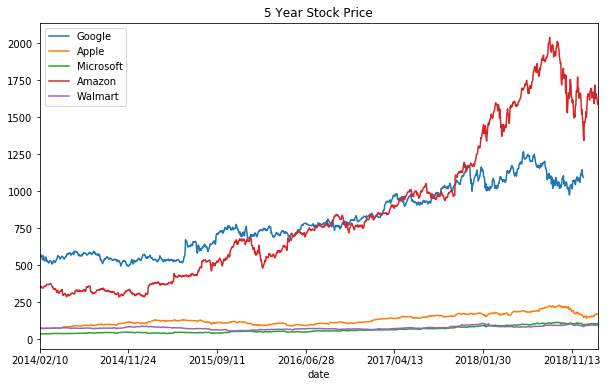

In [4]:
google["close"].plot(figsize = (10, 6), label = "Google", title = "5 Year Stock Price")
apple["close"].plot(label = "Apple")
microsoft["close"].plot(label = "Microsoft")
amazon["close"].plot(label = "Amazon")
walmart["close"].plot(label = "Walmart")
plt.legend()   # will tell you which line is which (top left ----- Google ----- Apple etc)

# 5 year trade volume

In [5]:
#list comprehension advanced technique
walmart["volume"] = [float(each) for each in walmart["volume"]] 

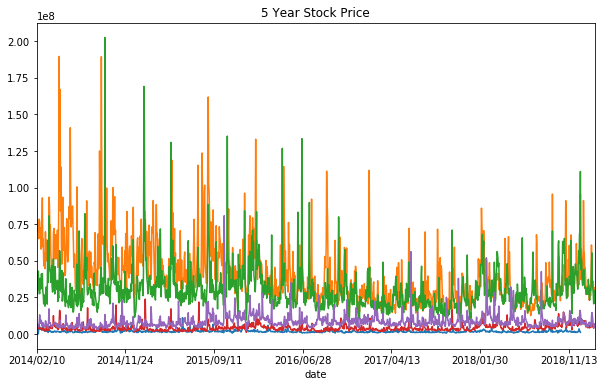

In [6]:
google["volume"].plot(figsize = (10, 6), label = "Google", title = "5 Year Stock Price")
apple["volume"].plot(label = "Apple")
microsoft["volume"].plot(label = "Microsoft")
amazon["volume"].plot(label = "Amazon")
walmart["volume"].plot(label = "Walmart")

# there is an error because the first value in Walmart volume is a string

### Microsoft bought MineCraft

In [7]:
microsoft["volume"].argmax() # you can check the date of the spike and research the event.

'2014/09/19'

# Total trade values in 5 years

In [8]:
google["total trade"] = google["open"]*google["volume"]
microsoft["total trade"] = microsoft["open"]*microsoft["volume"]
apple["total trade"] = apple["open"]*apple["volume"]
amazon["total trade"] = amazon["open"]*amazon["volume"]
walmart["total trade"] = walmart["open"]*walmart["volume"]



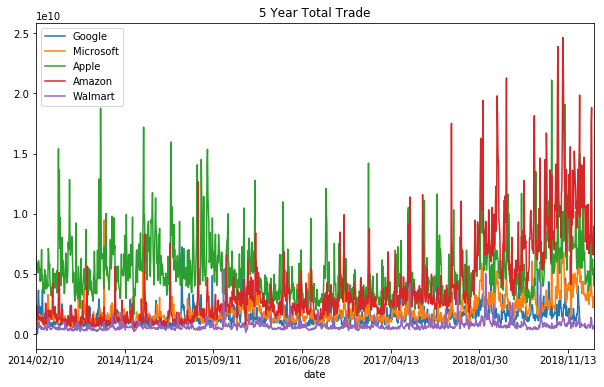

In [9]:
google["total trade"].plot(figsize = (10, 6), label = "Google", title = "5 Year Total Trade")
microsoft["total trade"].plot(label = "Microsoft")
apple["total trade"].plot(label = "Apple")
amazon["total trade"].plot(label = "Amazon")
walmart["total trade"].plot(label = "Walmart")
plt.legend()


## Google

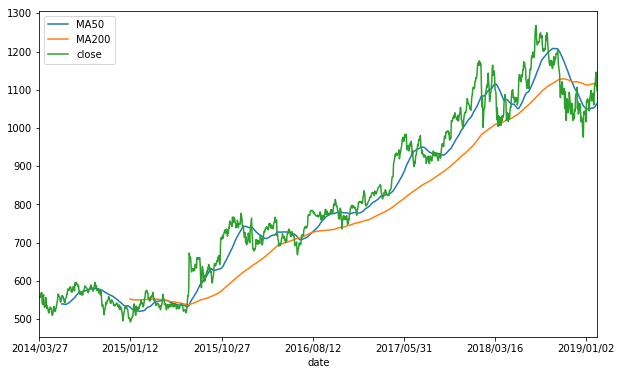

In [10]:
# MA = moving average
google["MA50"] = google["close"].rolling(50).mean()
google["MA200"] = google["close"].rolling(200).mean()
google[["MA50", "MA200", "close"]].plot(figsize = (10,6))

## Microsoft

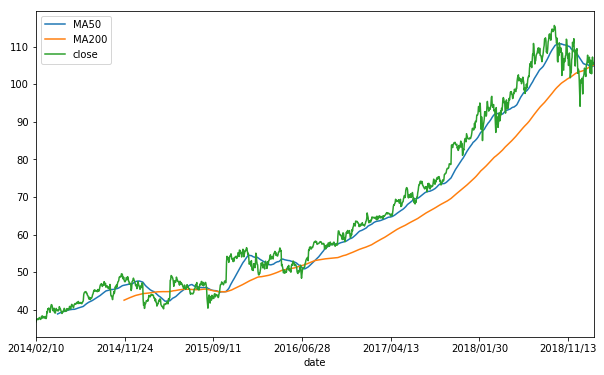

In [11]:
# MA = moving average
microsoft["MA50"] = microsoft["close"].rolling(50).mean()
microsoft["MA200"] = microsoft["close"].rolling(200).mean()
microsoft[["MA50", "MA200", "close"]].plot(figsize = (10,6))

## Apple

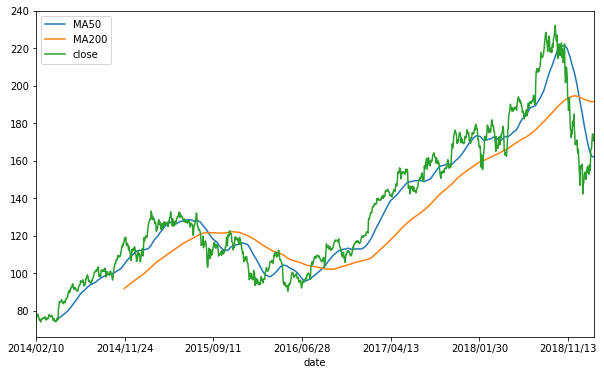

In [12]:
# MA = moving average
apple["MA50"] = apple["close"].rolling(50).mean()
apple["MA200"] = apple["close"].rolling(200).mean()
apple[["MA50", "MA200", "close"]].plot(figsize = (10,6))

## Amazon

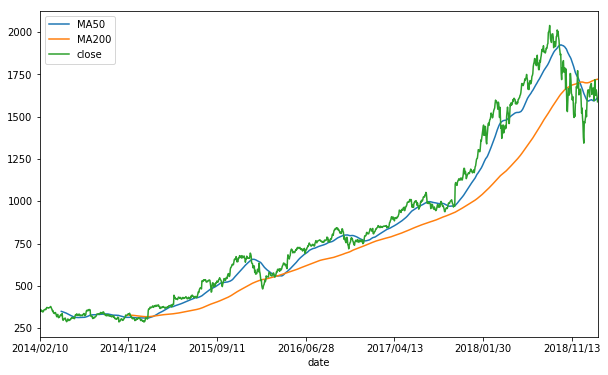

In [13]:
# MA = moving average
amazon["MA50"] = amazon["close"].rolling(50).mean()
amazon["MA200"] = amazon["close"].rolling(200).mean()
amazon[["MA50", "MA200", "close"]].plot(figsize = (10,6))

## Walmart

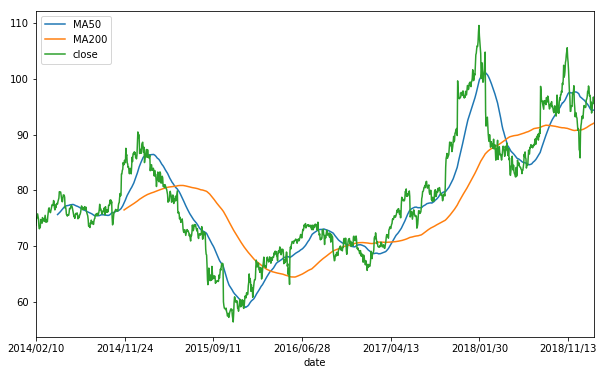

In [14]:
# MA = moving average
walmart["MA50"] = walmart["close"].rolling(50).mean()
walmart["MA200"] = walmart["close"].rolling(200).mean()
walmart[["MA50", "MA200", "close"]].plot(figsize = (10,6))

## Correlations

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
all_company = pd.concat([google["close"], 
                         amazon["close"], 
                         apple["close"],
                         microsoft["close"],
                         walmart["close"]], axis = 1)

all_company.columns = ["Google", "Amazon", "Apple", "Microsoft", "Walmart"]

In [17]:
all_company.head()

,Google,Amazon,Apple,Microsoft,Walmart
2014/02/10,NaN,360.87,75.5700,36.800,73.76
2014/02/11,NaN,361.79,76.5657,37.175,74.80
2014/02/12,NaN,349.25,76.5600,37.470,74.96
2014/02/13,NaN,357.20,77.7757,37.610,75.36
2014/02/14,NaN,357.35,77.7128,37.620,75.79


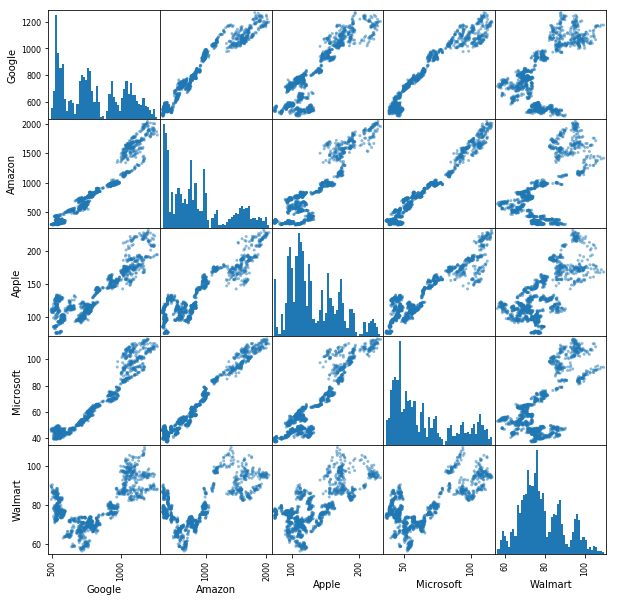

In [18]:
scatter_matrix(all_company, alpha = 0.5, figsize = (10,10), hist_kwds = {"bins": 50})
plt.show()

# Daily returns

In [19]:
google["daily returns"] = (google["close"]/google["close"].shift(1)) -1
microsoft["daily returns"] = (microsoft["close"]/microsoft["close"].shift(1)) -1
apple["daily returns"] = (apple["close"]/apple["close"].shift(1)) -1
amazon["daily returns"] = (amazon["close"]/amazon["close"].shift(1)) -1
walmart["daily returns"] = (walmart["close"]/walmart["close"].shift(1)) -1

In [20]:
google.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/03/27,558.46,13052.0,568.00,568.00,552.92,7413536.00,NaN,NaN,NaN
2014/03/28,559.99,41003.0,561.20,566.43,558.67,23010883.60,NaN,NaN,0.002740
2014/03/31,556.97,10772.0,566.89,567.00,556.93,6106539.08,NaN,NaN,-0.005393
2014/04/01,567.16,7932.0,558.71,568.45,558.71,4431687.72,NaN,NaN,0.018295
2014/04/02,567.00,146697.0,599.99,604.83,562.19,88016733.03,NaN,NaN,-0.000282


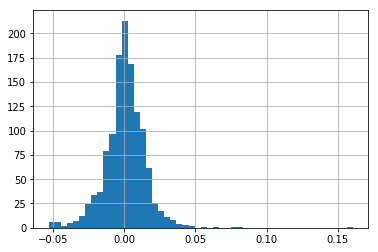

In [21]:
google["daily returns"].hist(bins = 50)

In [22]:
microsoft.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,36.800,26735870.0,36.63,36.80,36.29,9.793349e+08,NaN,NaN,NaN
2014/02/11,37.175,32133250.0,36.88,37.26,36.86,1.185074e+09,NaN,NaN,0.010190
2014/02/12,37.470,27051620.0,37.35,37.60,37.30,1.010378e+09,NaN,NaN,0.007935
2014/02/13,37.610,37635520.0,37.33,37.86,37.33,1.404934e+09,NaN,NaN,0.003736
2014/02/14,37.620,42985490.0,37.39,37.78,37.33,1.607227e+09,NaN,NaN,0.000266


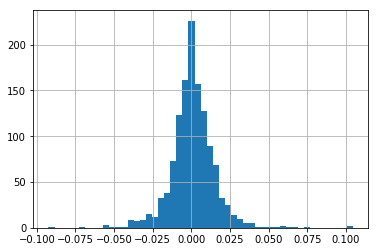

In [23]:
microsoft["daily returns"].hist(bins = 50)

In [24]:
apple.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,75.5700,86342646.0,74.0943,75.9985,74.0000,6.397498e+09,NaN,NaN,NaN
2014/02/11,76.5657,70489461.0,75.8014,76.8214,75.6428,5.343200e+09,NaN,NaN,0.013176
2014/02/12,76.5600,76994423.0,76.7071,77.0800,76.1771,5.906019e+09,NaN,NaN,-0.000074
2014/02/13,77.7757,76790093.0,76.3800,77.8357,76.3143,5.865227e+09,NaN,NaN,0.015879
2014/02/14,77.7128,68395257.0,77.4957,77.9971,77.3157,5.300338e+09,NaN,NaN,-0.000809


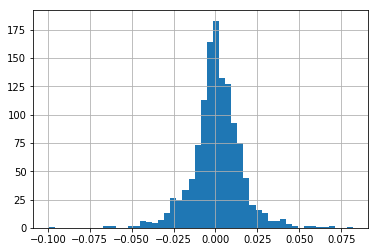

In [25]:
apple["daily returns"].hist(bins = 50)

In [26]:
amazon.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,360.87,3447970.0,361.610,365.00,359.35,1.246820e+09,NaN,NaN,NaN
2014/02/11,361.79,3220432.0,361.842,363.61,356.25,1.165288e+09,NaN,NaN,0.002549
2014/02/12,349.25,6586835.0,356.430,357.75,346.32,2.347746e+09,NaN,NaN,-0.034661
2014/02/13,357.20,4174300.0,347.700,357.20,346.50,1.451404e+09,NaN,NaN,0.022763
2014/02/14,357.35,3522810.0,359.340,359.34,353.35,1.265887e+09,NaN,NaN,0.000420


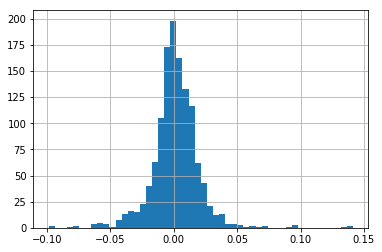

In [27]:
amazon["daily returns"].hist(bins = 50)

In [28]:
walmart.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,73.76,6204086.0,73.59,73.760,72.96,4.565587e+08,NaN,NaN,NaN
2014/02/11,74.80,6511228.0,73.90,74.850,73.67,4.811797e+08,NaN,NaN,0.014100
2014/02/12,74.96,5339771.0,74.22,75.180,74.22,3.963178e+08,NaN,NaN,0.002139
2014/02/13,75.36,5250165.0,74.68,75.490,74.56,3.920823e+08,NaN,NaN,0.005336
2014/02/14,75.79,4919940.0,75.40,75.985,75.10,3.709635e+08,NaN,NaN,0.005706


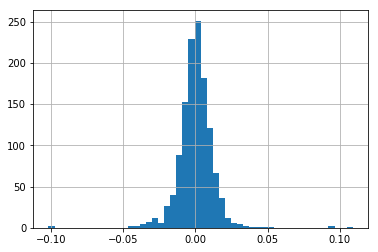

In [29]:
walmart["daily returns"].hist(bins = 50)

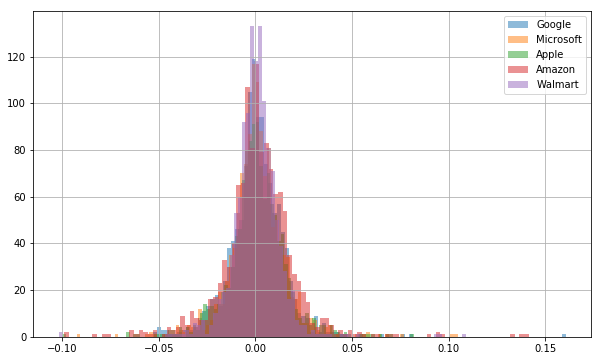

In [30]:
google["daily returns"].hist(bins = 100, figsize = (10,6), alpha = 0.5, label = "Google")
microsoft["daily returns"].hist(bins = 100, alpha = 0.5, label = "Microsoft")
apple["daily returns"].hist(bins = 100, alpha = 0.5, label = "Apple")
amazon["daily returns"].hist(bins = 100, alpha = 0.5, label = "Amazon")
walmart["daily returns"].hist(bins = 100, alpha = 0.5, label = "Walmart")

plt.legend()



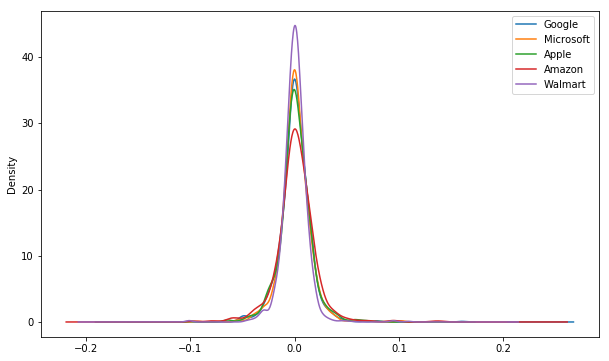

In [33]:
# Kernel Density Estimate (KDE)
google["daily returns"].plot(kind = "kde", label = "Google", figsize = (10,6))
microsoft["daily returns"].plot(kind = "kde", label = "Microsoft")
apple["daily returns"].plot(kind = "kde", label = "Apple")
amazon["daily returns"].plot(kind = "kde", label = "Amazon")
walmart["daily returns"].plot(kind = "kde", label = "Walmart")
plt.legend()

# Box plots

In [37]:
daily_returns = pd.concat([google["daily returns"],
                            microsoft["daily returns"],
                            apple["daily returns"],
                            amazon["daily returns"],
                            walmart["daily returns"]], axis = 1)

daily_returns.columns = ["Google", "Microsoft", "Apple", "Amazon", "Walmart"]

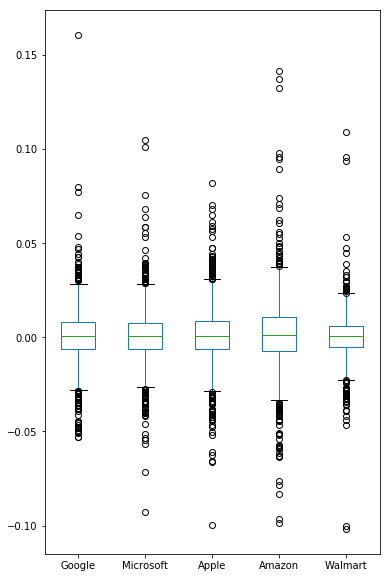

In [39]:
daily_returns.plot(kind = "box", figsize = (6,10))

# Scatter Matrix

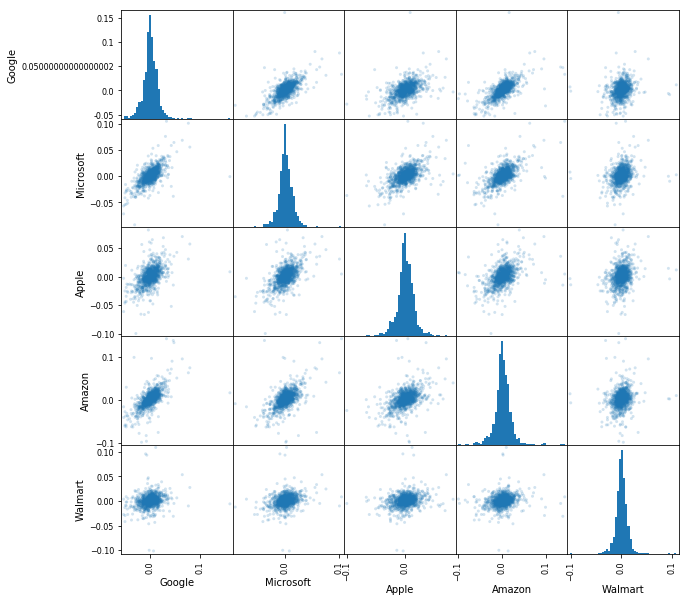

In [45]:
scatter_matrix(daily_returns, alpha = 0.2, figsize = (10,10), hist_kwds = {"bins": 50})
plt.show()

# Cumulative Returns

In [51]:
google["cumulative returns"] = (1+ google["daily returns"]).cumprod()
microsoft["cumulative returns"] = (1+ microsoft["daily returns"]).cumprod()
apple["cumulative returns"] = (1+ apple["daily returns"]).cumprod()
amazon["cumulative returns"] = (1+ amazon["daily returns"]).cumprod()
walmart["cumulative returns"] = (1+ walmart["daily returns"]).cumprod()

In [48]:
google.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns,cumulative returns
date,,,,,,,,,,
2014/03/27,558.46,13052.0,568.00,568.00,552.92,7413536.00,NaN,NaN,NaN,NaN
2014/03/28,559.99,41003.0,561.20,566.43,558.67,23010883.60,NaN,NaN,0.002740,1.002740
2014/03/31,556.97,10772.0,566.89,567.00,556.93,6106539.08,NaN,NaN,-0.005393,0.997332
2014/04/01,567.16,7932.0,558.71,568.45,558.71,4431687.72,NaN,NaN,0.018295,1.015579
2014/04/02,567.00,146697.0,599.99,604.83,562.19,88016733.03,NaN,NaN,-0.000282,1.015292


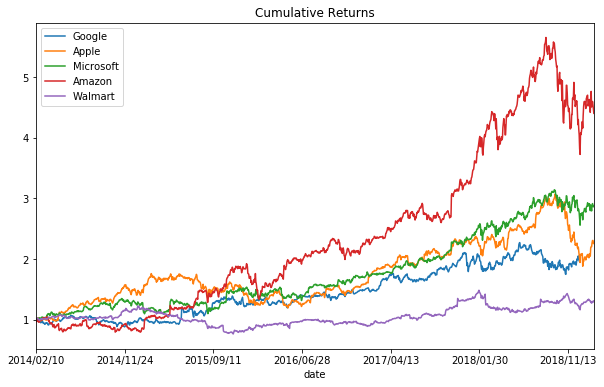

In [52]:
google["cumulative returns"].plot(figsize = (10, 6), label = "Google", title = "Cumulative Returns")
apple["cumulative returns"].plot(label = "Apple")
microsoft["cumulative returns"].plot(label = "Microsoft")
amazon["cumulative returns"].plot(label = "Amazon")
walmart["cumulative returns"].plot(label = "Walmart")
plt.legend()

# Portfolio

In [53]:
portfolio = pd.concat([google["close"],
                      microsoft["close"],
                      apple["close"],
                      amazon["close"],
                      walmart["close"]], axis = 1)

portfolio.columns = ["Google", "Microsoft", "Apple", "Amazon", "Walmart"]
portfolio.head()

,Google,Microsoft,Apple,Amazon,Walmart
2014/02/10,NaN,36.800,75.5700,360.87,73.76
2014/02/11,NaN,37.175,76.5657,361.79,74.80
2014/02/12,NaN,37.470,76.5600,349.25,74.96
2014/02/13,NaN,37.610,77.7757,357.20,75.36
2014/02/14,NaN,37.620,77.7128,357.35,75.79


In [56]:
# fillna() is fill NaN
portfolio["Google"] = portfolio["Google"].fillna(value = portfolio["Google"].mean())

In [57]:
portfolio.head()

,Google,Microsoft,Apple,Amazon,Walmart
2014/02/10,804.150863,36.800,75.5700,360.87,73.76
2014/02/11,804.150863,37.175,76.5657,361.79,74.80
2014/02/12,804.150863,37.470,76.5600,349.25,74.96
2014/02/13,804.150863,37.610,77.7757,357.20,75.36
2014/02/14,804.150863,37.620,77.7128,357.35,75.79


In [58]:
# pct_change is percentage change
avg_daily_return = portfolio.pct_change(1).mean()
avg_daily_return

Google       0.000400
Microsoft    0.000946
Apple        0.000765
Amazon       0.001366
Walmart      0.000281
dtype: float64

In [61]:
# Log Return
log_return = np.log(portfolio / portfolio.shift(1))

In [62]:
log_return.head()

,Google,Microsoft,Apple,Amazon,Walmart
2014/02/10,NaN,NaN,NaN,NaN,NaN
2014/02/11,0.0,0.010139,0.013090,0.002546,0.014001
2014/02/12,0.0,0.007904,-0.000074,-0.035276,0.002137
2014/02/13,0.0,0.003729,0.015754,0.022508,0.005322
2014/02/14,0.0,0.000266,-0.000809,0.000420,0.005690


# 1 single simulation

In [71]:
np.random.seed(101)

# Stocks
print("Stocks in portfolio: ")
print(portfolio.columns)
print()

# generate random weights
weights = np.array(np.random.random(len(portfolio.columns)))
weights = weights / np.sum(weights)

print(weights)

# expected_return
# 252 is the working days of the stock exchange
exp_return = np.sum(log_return.mean() * weights) * 252
print(exp_return)

# calculate the risk (volatility)
# T is transform
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
print(exp_vol)

# Sharpe Ratio
sr = exp_return/exp_vol
print(sr)

Stocks in portfolio: 
Index(['Google', 'Microsoft', 'Apple', 'Amazon', 'Walmart'], dtype='object')

[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]
0.123533553719
0.17470793376644225
0.7070861125525384


## 15000 Simulations

In [72]:
# numpy array should be in a tuple
num_sim = 15000
all_weights = np.zeros((num_sim, len(portfolio.columns)))
all_ret = np.zeros(num_sim)
all_vol = np.zeros(num_sim)
sharpe = np.zeros(num_sim)

for i in range(num_sim):
    weights = np.array(np.random.random(len(portfolio.columns)))
    weights = weights / np.sum(weights)
    
    all_weights[i, :] = weights
    
    exp_ret = (log_return.mean() * weights) * 252
    
    all_ret[i] = np.sum(exp_ret)
    all_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    
    sharpe[i] = all_ret[i] / all_vol[i]

In [75]:
sharpe.max()

1.0622333176885006

In [77]:
best = sharpe.argmax()
best

6958

In [78]:
best_ret = all_ret[best]
best_ret

0.2299918112078769

In [79]:
best_vol = all_vol[best]
best_vol

0.21651722590320963

In [82]:
print(all_weights[best, :])
print(portfolio.columns)

[0.00735134 0.42918686 0.09130753 0.40610278 0.06605149]
Index(['Google', 'Microsoft', 'Apple', 'Amazon', 'Walmart'], dtype='object')


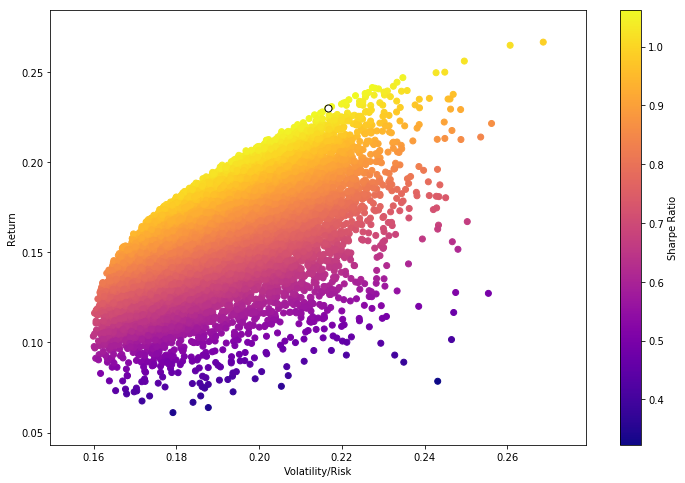

In [89]:
plt.figure(figsize = (12, 8))
plt.scatter(all_vol, all_ret, c = sharpe, cmap = "plasma")
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("Volatility/Risk")
plt.ylabel("Return")

plt.scatter(best_vol, best_ret, c = "white", s = 50, edgecolors = "black")